In [70]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
tqdm.pandas()

# Summary

Face recognition models are regular convolutional neural networks models. They represent face photos as vectors. We find the distance between these two vectors to compare two faces. Finally, we classify two faces as same person whose distance is less than a threshold value.

The question is that how to determine the threshold. In this notebook, we will find the best split point for a threshold.

# Data set

In [71]:
# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "son": ["img1_1.jpg", "img1_2.jpg", "img1_3.jpg"],
    "girl": ["img2_1.jpg", "img2_2.jpg", "img2_3.jpg", "img2_4.jpg"],
    "Coogie": ["img3_1.jpg", "img3_2.jpg", "img3_3.jpg"],
}

# Positive samples
Find different photos of same people

In [72]:
positives = []

for key, values in idendities.items():
    
    print(key)
    print(values)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

print(positives)

son
['img1_1.jpg', 'img1_2.jpg', 'img1_3.jpg']
girl
['img2_1.jpg', 'img2_2.jpg', 'img2_3.jpg', 'img2_4.jpg']
Coogie
['img3_1.jpg', 'img3_2.jpg', 'img3_3.jpg']
[['img1_1.jpg', 'img1_2.jpg'], ['img1_1.jpg', 'img1_3.jpg'], ['img1_2.jpg', 'img1_3.jpg'], ['img2_1.jpg', 'img2_2.jpg'], ['img2_1.jpg', 'img2_3.jpg'], ['img2_1.jpg', 'img2_4.jpg'], ['img2_2.jpg', 'img2_3.jpg'], ['img2_2.jpg', 'img2_4.jpg'], ['img2_3.jpg', 'img2_4.jpg'], ['img3_1.jpg', 'img3_2.jpg'], ['img3_1.jpg', 'img3_3.jpg'], ['img3_2.jpg', 'img3_3.jpg']]


In [73]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"
positives

file_x      file_y decision
0   img1_1.jpg  img1_2.jpg      Yes
1   img1_1.jpg  img1_3.jpg      Yes
2   img1_2.jpg  img1_3.jpg      Yes
3   img2_1.jpg  img2_2.jpg      Yes
4   img2_1.jpg  img2_3.jpg      Yes
5   img2_1.jpg  img2_4.jpg      Yes
6   img2_2.jpg  img2_3.jpg      Yes
7   img2_2.jpg  img2_4.jpg      Yes
8   img2_3.jpg  img2_4.jpg      Yes
9   img3_1.jpg  img3_2.jpg      Yes
10  img3_1.jpg  img3_3.jpg      Yes
11  img3_2.jpg  img3_3.jpg      Yes

# Negative samples
Compare photos of different people

In [74]:
samples_list = list(idendities.values())

In [75]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        print(cross_product)
        
        for cross_sample in cross_product:
            print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)
        

['img1_1.jpg', 'img1_2.jpg', 'img1_3.jpg']  vs  ['img2_1.jpg', 'img2_2.jpg', 'img2_3.jpg', 'img2_4.jpg']
[('img1_1.jpg', 'img2_1.jpg'), ('img1_1.jpg', 'img2_2.jpg'), ('img1_1.jpg', 'img2_3.jpg'), ('img1_1.jpg', 'img2_4.jpg'), ('img1_2.jpg', 'img2_1.jpg'), ('img1_2.jpg', 'img2_2.jpg'), ('img1_2.jpg', 'img2_3.jpg'), ('img1_2.jpg', 'img2_4.jpg'), ('img1_3.jpg', 'img2_1.jpg'), ('img1_3.jpg', 'img2_2.jpg'), ('img1_3.jpg', 'img2_3.jpg'), ('img1_3.jpg', 'img2_4.jpg')]
img1_1.jpg  vs  img2_1.jpg
img1_1.jpg  vs  img2_2.jpg
img1_1.jpg  vs  img2_3.jpg
img1_1.jpg  vs  img2_4.jpg
img1_2.jpg  vs  img2_1.jpg
img1_2.jpg  vs  img2_2.jpg
img1_2.jpg  vs  img2_3.jpg
img1_2.jpg  vs  img2_4.jpg
img1_3.jpg  vs  img2_1.jpg
img1_3.jpg  vs  img2_2.jpg
img1_3.jpg  vs  img2_3.jpg
img1_3.jpg  vs  img2_4.jpg
['img1_1.jpg', 'img1_2.jpg', 'img1_3.jpg']  vs  ['img3_1.jpg', 'img3_2.jpg', 'img3_3.jpg']
[('img1_1.jpg', 'img3_1.jpg'), ('img1_1.jpg', 'img3_2.jpg'), ('img1_1.jpg', 'img3_3.jpg'), ('img1_2.jpg', 'img3_1.jpg')

In [76]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"
negatives

file_x      file_y decision
0   img1_1.jpg  img2_1.jpg       No
1   img1_1.jpg  img2_2.jpg       No
2   img1_1.jpg  img2_3.jpg       No
3   img1_1.jpg  img2_4.jpg       No
4   img1_2.jpg  img2_1.jpg       No
5   img1_2.jpg  img2_2.jpg       No
6   img1_2.jpg  img2_3.jpg       No
7   img1_2.jpg  img2_4.jpg       No
8   img1_3.jpg  img2_1.jpg       No
9   img1_3.jpg  img2_2.jpg       No
10  img1_3.jpg  img2_3.jpg       No
11  img1_3.jpg  img2_4.jpg       No
12  img1_1.jpg  img3_1.jpg       No
13  img1_1.jpg  img3_2.jpg       No
14  img1_1.jpg  img3_3.jpg       No
15  img1_2.jpg  img3_1.jpg       No
16  img1_2.jpg  img3_2.jpg       No
17  img1_2.jpg  img3_3.jpg       No
18  img1_3.jpg  img3_1.jpg       No
19  img1_3.jpg  img3_2.jpg       No
20  img1_3.jpg  img3_3.jpg       No
21  img2_1.jpg  img3_1.jpg       No
22  img2_1.jpg  img3_2.jpg       No
23  img2_1.jpg  img3_3.jpg       No
24  img2_2.jpg  img3_1.jpg       No
25  img2_2.jpg  img3_2.jpg       No
26  img2_2.jpg  img3_3.jpg       No
27  img2_3.jpg  img3_1.jpg       No
28  img2_3.jpg  img3_2.jpg       No
29  img2_3.jpg  img3_3.jpg       No
30  img2_4.jpg  img3_1.jpg       No
31  img2_4.jpg  img3_2.jpg       No
32  img2_4.jpg  img3_3.jpg       No

# Merge Positives and Negative Samples

In [77]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [78]:
df.shape

(45, 3)

In [79]:
df.decision.value_counts()

No     33
Yes    12
Name: decision, dtype: int64

In [80]:
df

file_x      file_y decision
0   img1_1.jpg  img1_2.jpg      Yes
1   img1_1.jpg  img1_3.jpg      Yes
2   img1_2.jpg  img1_3.jpg      Yes
3   img2_1.jpg  img2_2.jpg      Yes
4   img2_1.jpg  img2_3.jpg      Yes
5   img2_1.jpg  img2_4.jpg      Yes
6   img2_2.jpg  img2_3.jpg      Yes
7   img2_2.jpg  img2_4.jpg      Yes
8   img2_3.jpg  img2_4.jpg      Yes
9   img3_1.jpg  img3_2.jpg      Yes
10  img3_1.jpg  img3_3.jpg      Yes
11  img3_2.jpg  img3_3.jpg      Yes
12  img1_1.jpg  img2_1.jpg       No
13  img1_1.jpg  img2_2.jpg       No
14  img1_1.jpg  img2_3.jpg       No
15  img1_1.jpg  img2_4.jpg       No
16  img1_2.jpg  img2_1.jpg       No
17  img1_2.jpg  img2_2.jpg       No
18  img1_2.jpg  img2_3.jpg       No
19  img1_2.jpg  img2_4.jpg       No
20  img1_3.jpg  img2_1.jpg       No
21  img1_3.jpg  img2_2.jpg       No
22  img1_3.jpg  img2_3.jpg       No
23  img1_3.jpg  img2_4.jpg       No
24  img1_1.jpg  img3_1.jpg       No
25  img1_1.jpg  img3_2.jpg       No
26  img1_1.jpg  img3_3.jpg       No
27  img1_2.jpg  img3_1.jpg       No
28  img1_2.jpg  img3_2.jpg       No
29  img1_2.jpg  img3_3.jpg       No
30  img1_3.jpg  img3_1.jpg       No
31  img1_3.jpg  img3_2.jpg       No
32  img1_3.jpg  img3_3.jpg       No
33  img2_1.jpg  img3_1.jpg       No
34  img2_1.jpg  img3_2.jpg       No
35  img2_1.jpg  img3_3.jpg       No
36  img2_2.jpg  img3_1.jpg       No
37  img2_2.jpg  img3_2.jpg       No
38  img2_2.jpg  img3_3.jpg       No
39  img2_3.jpg  img3_1.jpg       No
40  img2_3.jpg  img3_2.jpg       No
41  img2_3.jpg  img3_3.jpg       No
42  img2_4.jpg  img3_1.jpg       No
43  img2_4.jpg  img3_2.jpg       No
44  img2_4.jpg  img3_3.jpg       No

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [83]:
# df.file_x = "deepface/tests/dataset/"+df.file_x
# df.file_y = "deepface/tests/dataset/"+df.file_y

df.file_x = "./mydata/"+df.file_x
df.file_y = "./mydata/"+df.file_y

# DeepFace

In [84]:
pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from deepface import DeepFace

In [86]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['./mydata/img1_1.jpg', './mydata/img1_2.jpg'],
 ['./mydata/img1_1.jpg', './mydata/img1_3.jpg'],
 ['./mydata/img1_2.jpg', './mydata/img1_3.jpg'],
 ['./mydata/img2_1.jpg', './mydata/img2_2.jpg'],
 ['./mydata/img2_1.jpg', './mydata/img2_3.jpg'],
 ['./mydata/img2_1.jpg', './mydata/img2_4.jpg'],
 ['./mydata/img2_2.jpg', './mydata/img2_3.jpg'],
 ['./mydata/img2_2.jpg', './mydata/img2_4.jpg'],
 ['./mydata/img2_3.jpg', './mydata/img2_4.jpg'],
 ['./mydata/img3_1.jpg', './mydata/img3_2.jpg'],
 ['./mydata/img3_1.jpg', './mydata/img3_3.jpg'],
 ['./mydata/img3_2.jpg', './mydata/img3_3.jpg'],
 ['./mydata/img1_1.jpg', './mydata/img2_1.jpg'],
 ['./mydata/img1_1.jpg', './mydata/img2_2.jpg'],
 ['./mydata/img1_1.jpg', './mydata/img2_3.jpg'],
 ['./mydata/img1_1.jpg', './mydata/img2_4.jpg'],
 ['./mydata/img1_2.jpg', './mydata/img2_1.jpg'],
 ['./mydata/img1_2.jpg', './mydata/img2_2.jpg'],
 ['./mydata/img1_2.jpg', './mydata/img2_3.jpg'],
 ['./mydata/img1_2.jpg', './mydata/img2_4.jpg'],
 ['./mydata/img1_3.j

In [87]:
model_name = "VGG-Face"
distance_metric = "cosine"

1


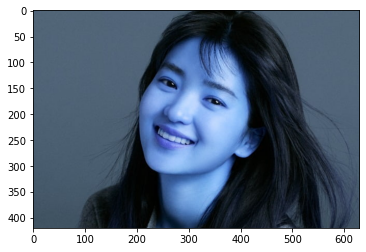

2
3


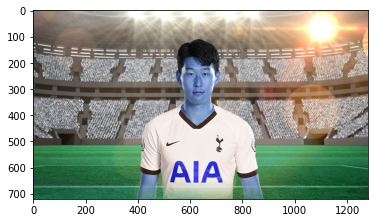

4


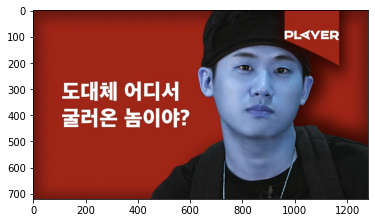

5


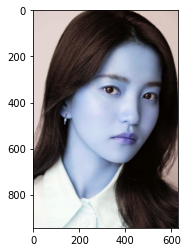

6


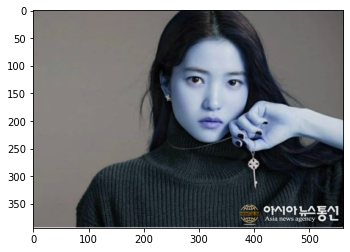

7
8


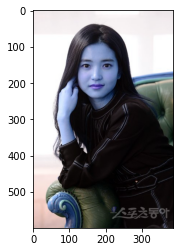

9


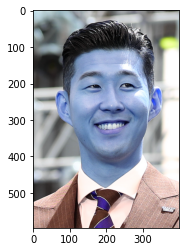

10


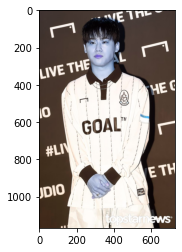

In [110]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import glob
import sys
import cv2
import random

models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
metrics = ["cosine", "euclidean", "euclidean_l2"]

#1. DB 이미지 리스트 불러오기
imgs = glob.glob('mydata/*.jpg')

#2. 이미지 없을 때 예외처리
if not imgs:
    print("이미지가 없습니다.")
    sys.exit()

#3. DB 이미지 리스트 전처리
i = 0
for img in imgs:
    i+=1
    print(i)
    if i == 2 or i == 7: continue
    aaa = cv2.imread(img)
    plt.imshow(aaa)
    plt.show()
    aligned_img = DeepFace.detectFace(img)
    # plt.imsave(img,aligned_img)

#4. 입력 이미지 전처리
# input_img = "img2_1.png"
# aligned_face = DeepFace.detectFace(input_img)
# plt.imshow(aligned_face)
# plt.show()
# plt.imsave(input_img, aligned_face)

#5. 모든 모델에 대해 시행

# for i in range(len(models)):
#     df = DeepFace.find(img_path=input_img, db_path="./test", model_name=models[i], distance_metric=metrics[2])
#     print(df)

In [ ]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)
resp_obj

In [ ]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
distances

In [ ]:
df["distance"] = distances

# Analyzing Distances

In [ ]:
# 같은 사람 얼굴의 mean, standard deviation
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4)
tp_std = round(df[df.decision == "Yes"].std().values[0], 4)

# 다른 사람 얼굴의 mean, standard deviation
fp_mean = round(df[df.decision == "No"].mean().values[0], 4)
fp_std = round(df[df.decision == "No"].std().values[0], 4)

In [ ]:
print("Mean of true positives: ", tp_mean)
print("Std of true positives: ", tp_std)
print("Mean of false positives: ", fp_mean)
print("Std of false positives: ", fp_std)

# Distribution

In [ ]:
df[df.decision == "Yes"].distance.plot.kde()
df[df.decision == "No"].distance.plot.kde()

# Best Split Point

In [ ]:
pip install chefboost

In [ ]:
from chefboost import Chefboost as chef

In [ ]:
config = {'algorithm': 'C4.5'}

In [ ]:
tmp_df = df[['distance', 'decision']].rename(columns = {"decision": "Decision"}).copy()
print(tmp_df)
model = chef.fit(tmp_df, config)

# Sigma

In [ ]:
sigma = 2
#2 sigma corresponds 95.45% confidence, and 3 sigma corresponds 99.73% confidence

#threshold = round(tp_mean + sigma * tp_std, 4)
threshold = 0.3147 #comes from c4.5 algorithm
print("threshold: ", threshold)

In [ ]:
df[df.decision == 'Yes'].distance.max()

In [ ]:
df[df.decision == 'No'].distance.min()

# Evaluation

In [ ]:
df["prediction"] = "No"

In [ ]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [ ]:
df.sample(5)

In [ ]:
cm = confusion_matrix(df.decision.values, df.prediction.values)

In [ ]:
cm

In [ ]:
tn, fp, fn, tp = cm.ravel()

In [ ]:
tn, fp, fn, tp

In [ ]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

In [ ]:
df.to_csv("threshold_pivot.csv", index = False)

## Test results

### Threshold = 0.3147 (C4.5 best split point)

Precision:  100.0 %

Recall:  89.47368421052632 %

F1 score  94.44444444444444%

Accuracy:  98.66666666666667 %

### Threshold = 0.3751 (2 sigma)

Precision:  90.47619047619048 %

Recall:  100.0 %

F1 score  95.0 %

Accuracy:  98.66666666666667 %